### Pandas를 활용한 서울시 CCTV 현황 분석 및 인구 현황 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### CCTV 설치 현황

In [2]:
CCTV_Seoul = pd.read_excel("../Data/CCTV_in_Seoul_2018.xlsx")
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [3]:
# 기관명을 구별로 변경하기
CCTV_Seoul.rename({'기관명':'구별'}, axis=1, inplace=True)
# CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [4]:
# NaN 데이터 확인 후 NaN이 있으면 NaN을 처리하기
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구별        25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [5]:
CCTV_Seoul.iloc[:, 3].head()

0    195.0
1    387.0
2     88.0
3    155.0
4     56.0
Name: 2012년, dtype: float64

In [6]:
# 결측치 확인
for i in range(2, len(CCTV_Seoul.columns)):
    nanCount = len(CCTV_Seoul.iloc[:, i] [CCTV_Seoul.iloc[:,i].isna()])
    print(CCTV_Seoul.columns[i], ":%5d"%(nanCount))

2011년 이전 :    2
2012년 :    2
2013년 :    2
2014년 :    0
2015년 :    0
2016년 :    0
2017년 :    0
2018년 :    0


In [7]:
CCTV_Seoul.fillna(value = 0, inplace=True)

In [8]:
pop_Seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx", 
                            header=3,    #1,2,3 세번째 행으로 header로 사용
                            usecols="B, D, G, J, N"     # excel에서 사용할 컬럼 확인 후 사용할 컬럼만 가져옴
                        )
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [9]:
# 열이름 변경 (merge 위해 key 값 맞춰주기)
pop_Seoul.columns=['구별','인구수','한국인','외국인','고령자']
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [10]:
# 합계 행을 삭제
# pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [11]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,516662,499374,17288,76664
22,서초구,434801,430568,4233,58332
23,강남구,549898,544804,5094,72602
24,송파구,680883,674095,6788,89539
25,강동구,457042,452646,4396,66401


---
## CCTV 현황

In [12]:
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [13]:
# 소계 기준으로 내림차순 정렬
CCTV_Seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


#### 3년간 CCTV증가율을 구해서 CCTV가 제일 많이 증가한 구를 표시
- 과거 CCTV 개수 대비 최근 3년 CCTV 개수를 보면 증가율을 볼 수 있다.

In [14]:
CCTV_Seoul['최근증가율'] = \
    (CCTV_Seoul.iloc[:,7:10].sum(axis=1)) / (CCTV_Seoul.iloc[:,2:7].sum(axis=1)) * 100

CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


---
## 인구 현황

In [15]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [16]:
# 구별 항목 파악
pop_Seoul['구별'].unique()
len(pop_Seoul['구별'].unique())

26

In [17]:
# 고령자 비율과 외국인 비율을 계산 후 적용
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10013781,9733655,280126,1518239,2.797405,15.161496
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228


In [18]:
# 인구수가 제일 많은 지역
pop_Seoul.sort_values(by='인구수', ascending=False).iloc[0]

구별              합계
인구수       10013781
한국인        9733655
외국인         280126
고령자        1518239
외국인비율     2.797405
고령자비율    15.161496
Name: 0, dtype: object

In [19]:
# 외국인 수가 제일 많은 지역
pop_Seoul.sort_values(by='외국인', ascending=False).head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10013781,9733655,280126,1518239,2.797405,15.161496
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615


In [20]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
2,중구,136469,126175,10294,23794,7.543105,17.435462
18,금천구,251370,232583,18787,38508,7.473843,15.319251


In [21]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(2)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10013781,9733655,280126,1518239,2.797405,15.161496
24,송파구,680883,674095,6788,89539,0.996941,13.150424


In [22]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(2)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171


---
### CCTV 데이터와 인구현황 데이터 합치기

In [23]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [24]:
# 연습
# data_result.iloc[:,2:10].columns

In [25]:
data_result.drop(data_result.iloc[:,2:10].columns, axis=1, inplace=True)
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [26]:
# 다른 방법
# for i in data_result.columns[2:10]:
#     del data_result[i]
    
# data_result.head()

In [27]:
# index 구별 컬럼으로 만든다.
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [28]:
# 고령자 비율과 소계의 상관계수
# 음의 상관, 고령자비율이 높을수록 CCTV 개수가 적다.
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [29]:
# 외국인 비율과 소계의 상관계수
# 상관 없다.(?)
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [30]:
# 인구수와 소계의 상관계수
# 양의 상관, 인구수가 높을수록 CCTV 개수가 많다.
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

- CCTV 설치는 범죄와는 상관 없다. (외국인, 인구수와 크게 상관이 없으므로)
- CCTV는 교통사고용이다. 범죄는 사고 후 증거 데이터용(예방용 아님)

In [31]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [32]:
data_result1 = data_result.sort_values(by='소계')

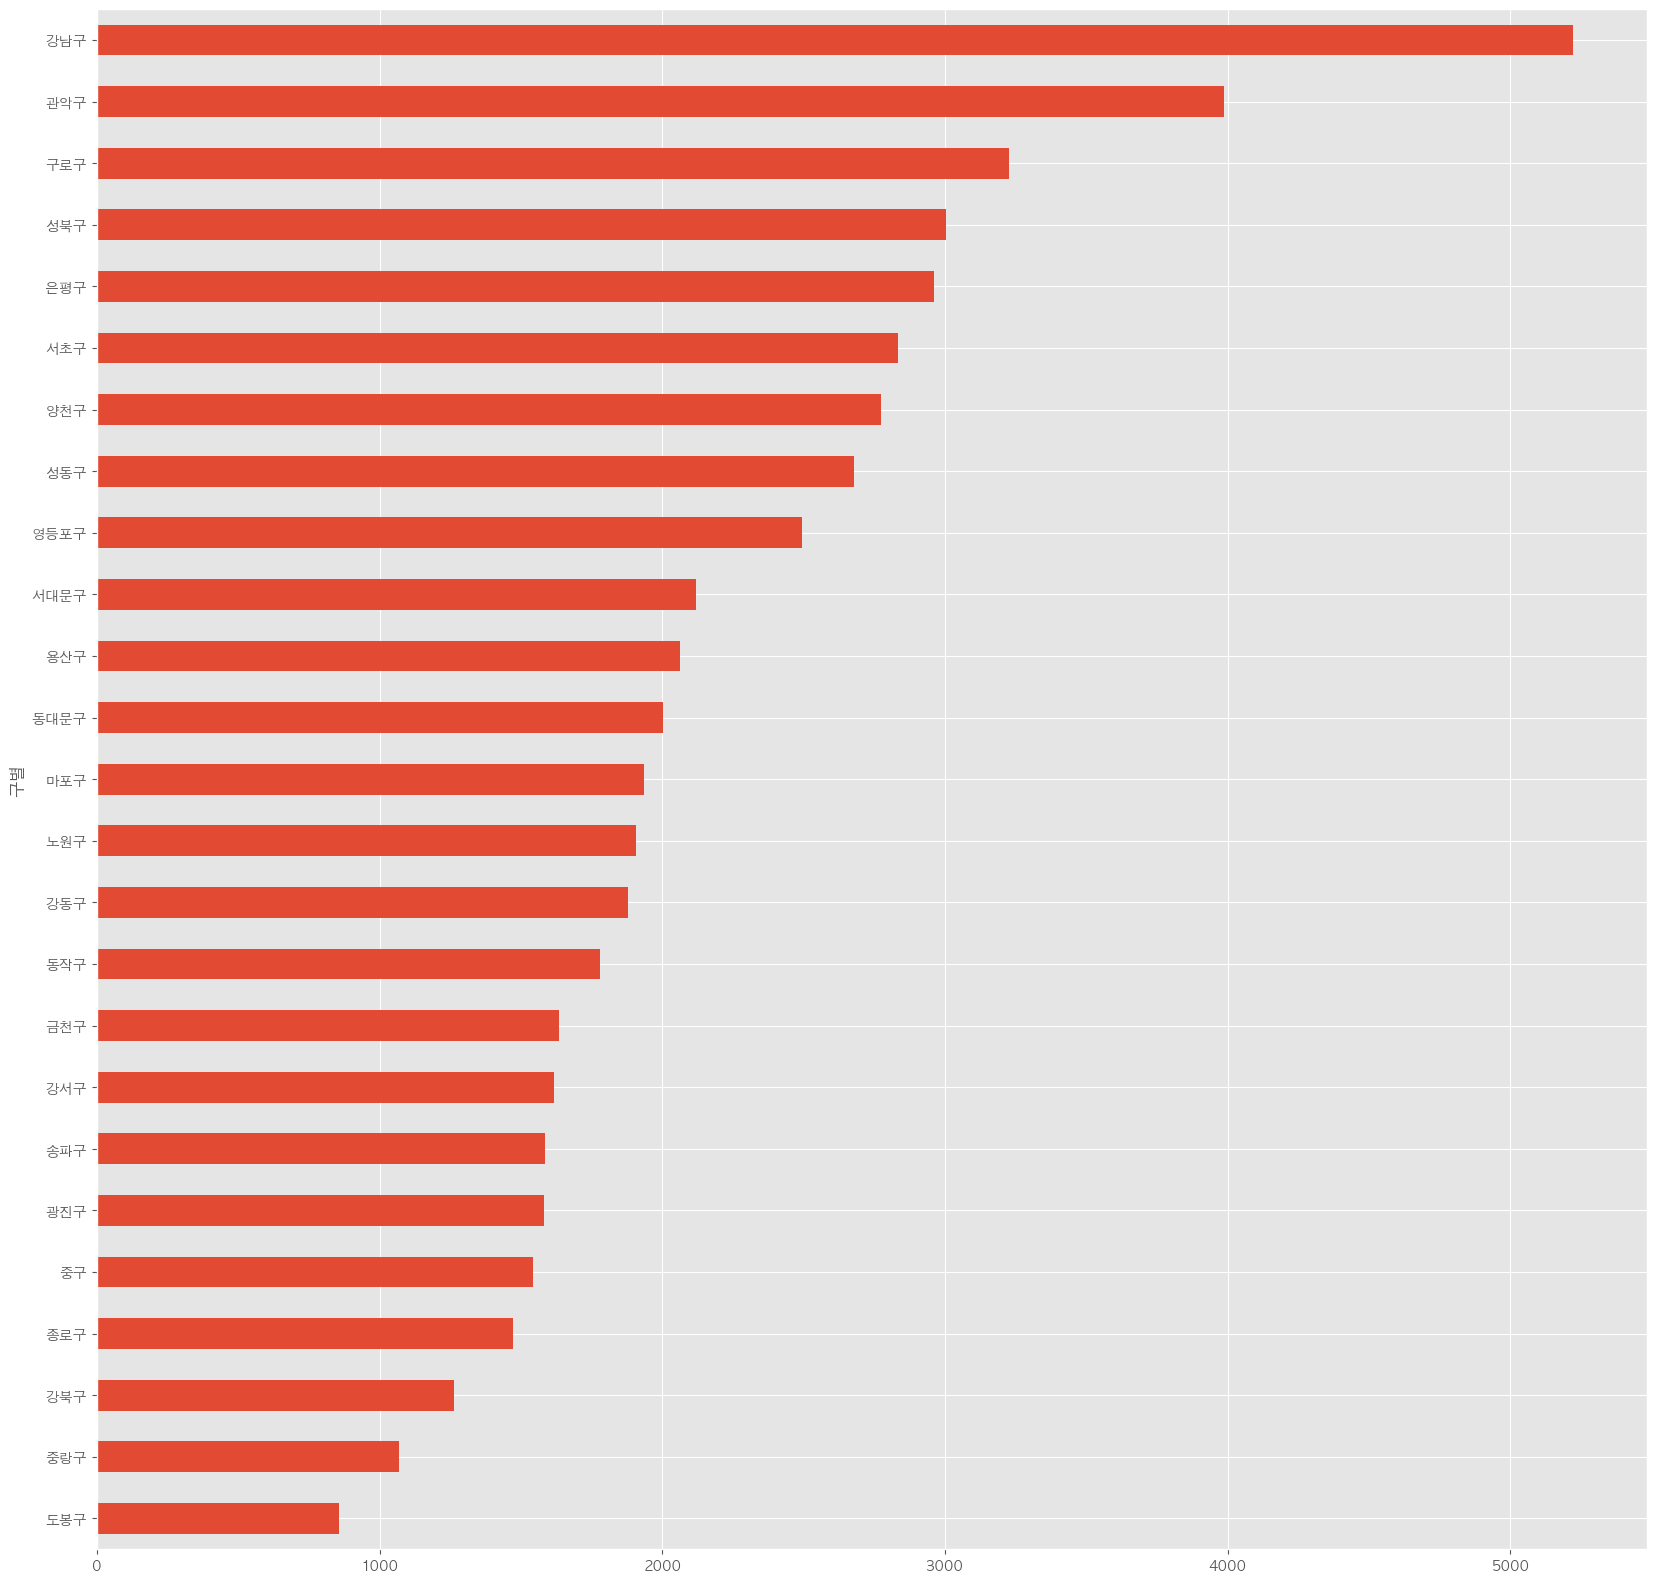

In [33]:
plt.style.use('ggplot')
data_result1[data_result.columns[0]].plot(
    kind='barh',    # bar는 세로, barh는 가로로 나온다.
    figsize=(20, 20),
    # color = ['orange', 'green','skyblue']
)
plt.show()

- 인구 대비 CCTV 비율

In [34]:
data_result

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328
광진구,1581,111.930295,365990,350417,15573,48989,4.255034,13.385338
구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615
금천구,1634,112.483745,251370,232583,18787,38508,7.473843,15.319251
노원구,1906,42.026826,535495,531037,4458,82682,0.832501,15.440294


In [35]:
data_result.columns[2]
data_result.columns[0]

'소계'

In [36]:
pop_CCTV = data_result[data_result.columns[0]] / data_result[data_result.columns[2]] * 100

In [37]:
data_result['CCTV비율'] = pop_CCTV

In [38]:
data_result = data_result.sort_values(by='CCTV비율')

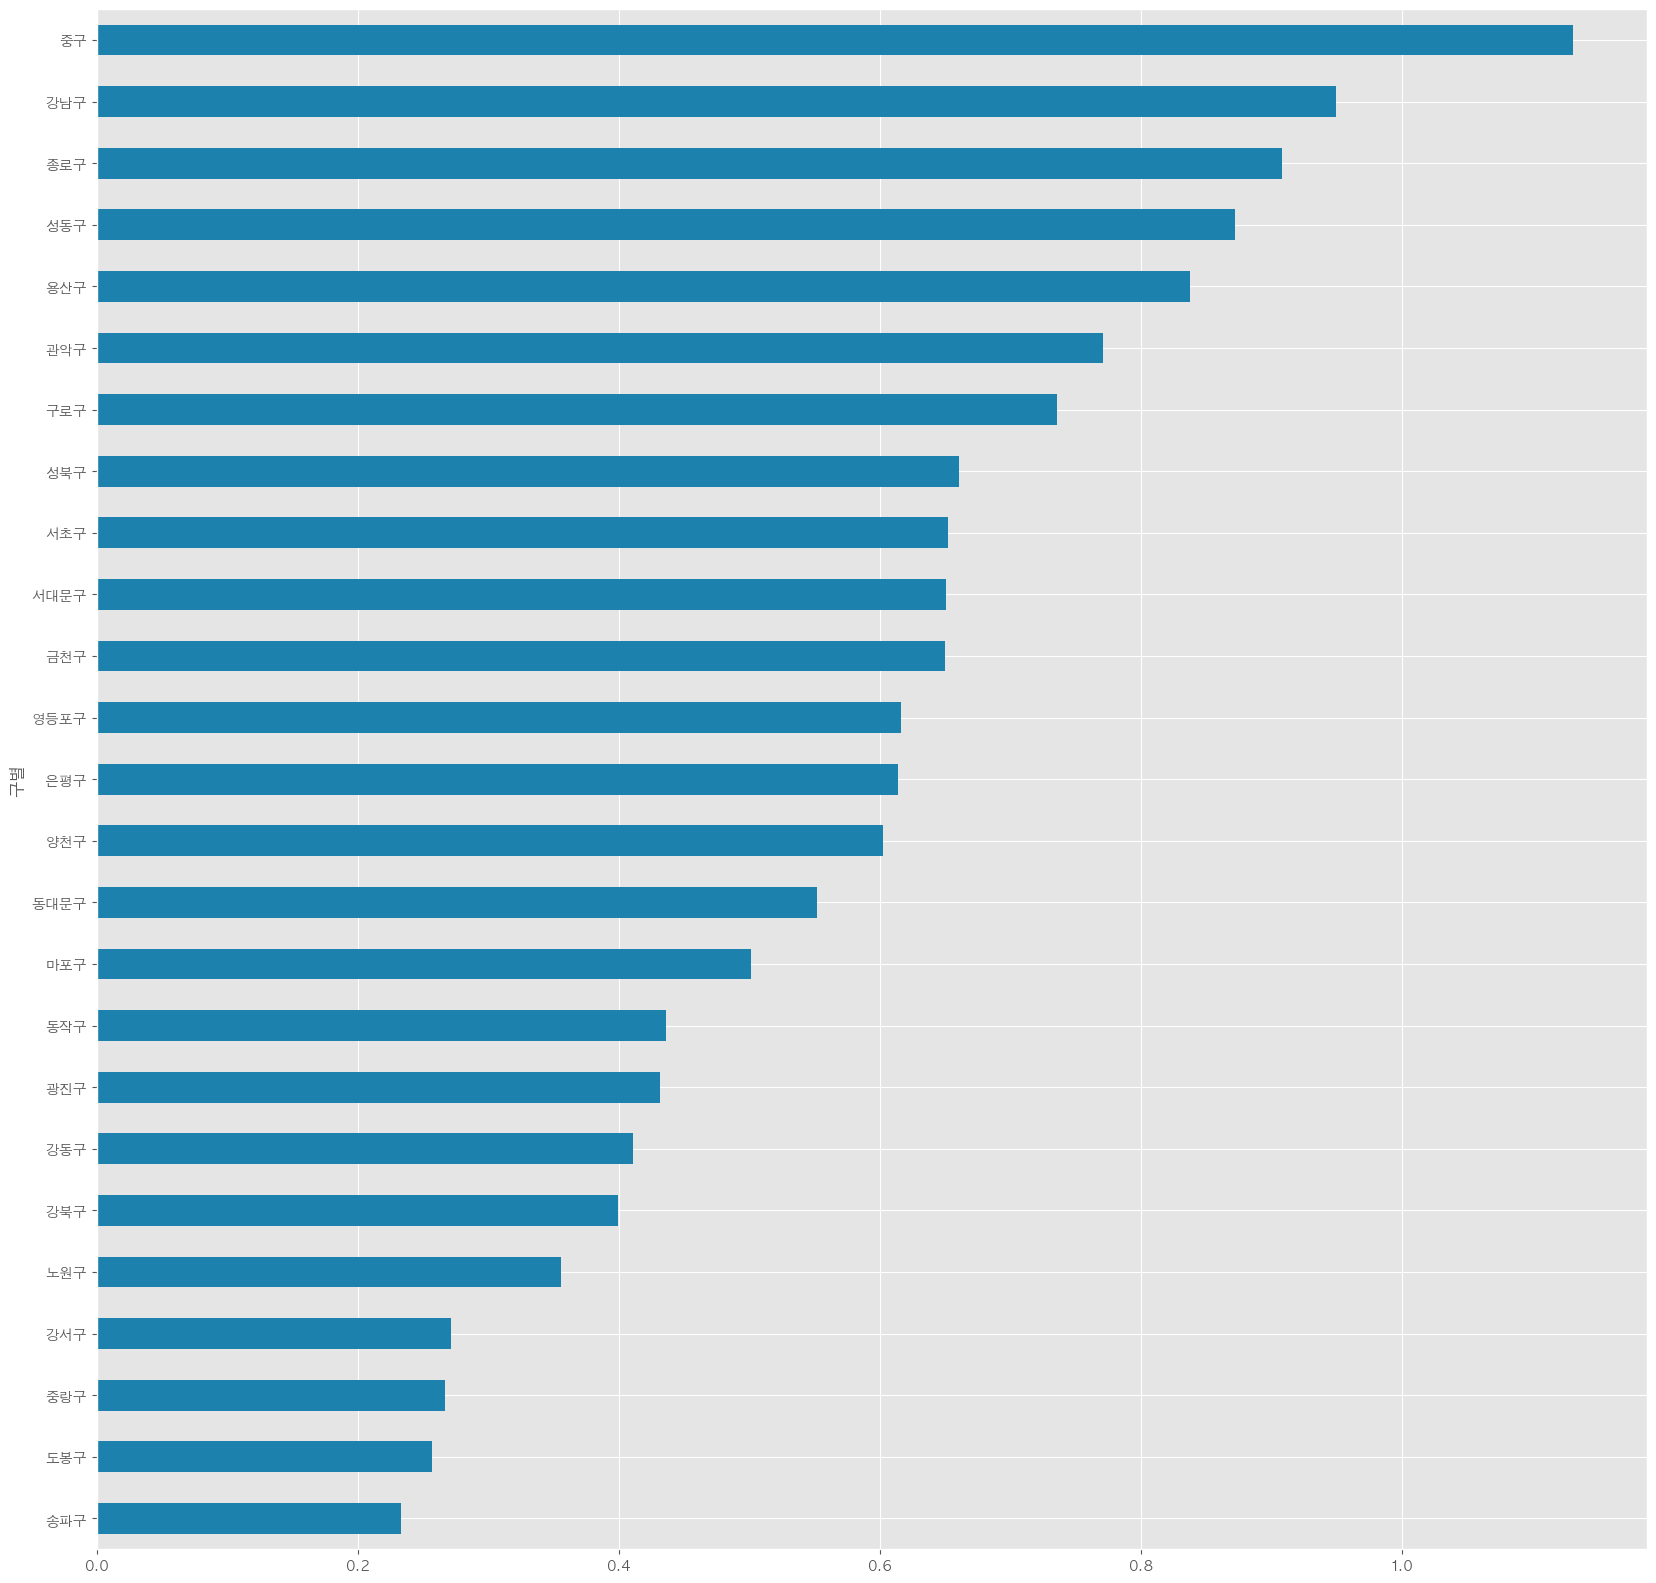

In [39]:
plt.style.use('ggplot')
data_result['CCTV비율'].plot(
    kind='barh',    # bar는 세로, barh는 가로로 나온다.
    figsize=(20, 20),
    color = '#1C82AD'
)
plt.show()

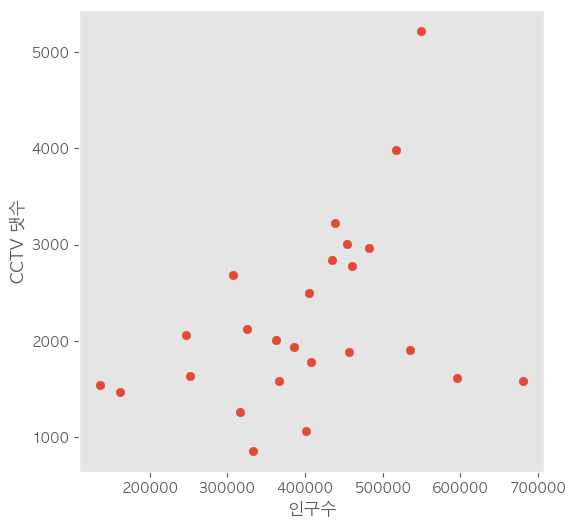

In [40]:
# 산점도를 이용한 시각화
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV 댓수')
plt.grid()
plt.show()

In [41]:
# 인구수, 소계(CCTV댓수)에 따른 기준선 만들기, 1(일차식)
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.88522756e-03, 1.06403852e+03])

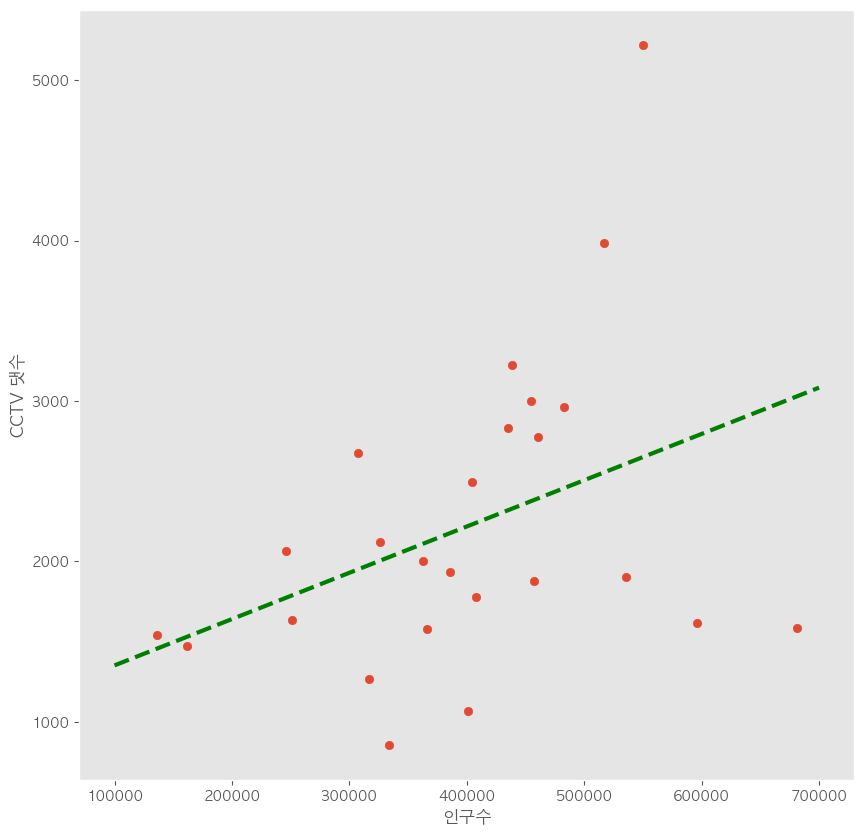

In [42]:
# y축 데이터
f1 = np.poly1d(fp1)

# x축 데이터
fx = np.linspace(100000, 700000)

# 산점도를 이용한 시각화
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'])
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV 댓수')
plt.grid()
plt.show()


---
#### 직선과의 오차를 구하는 공식과 오차가 큰 순으로 데이터 정렬 후 그래프 그리기

In [43]:
# 기준선 구하기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

# y축 : CCTV 기준치 구하기
f1 = np.poly1d(fp1)

# x축: 인구수
fx = np.linspace(100000, 700000)

# 소계에서 기준인구수 차이로 오차값 구하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

# 정렬
df_sort = data_result.sort_values(by='오차', ascending=False)

df_sort

## CCTV 비율이 높으면 오차가 + , 낮으면 오차가 -

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.949449,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.232933,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.771297,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.257275,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444,1165.777237
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757,0.266548,1152.085731
구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615,0.736240,898.343155
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228,0.872090,728.639767
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,0.399369,712.934353


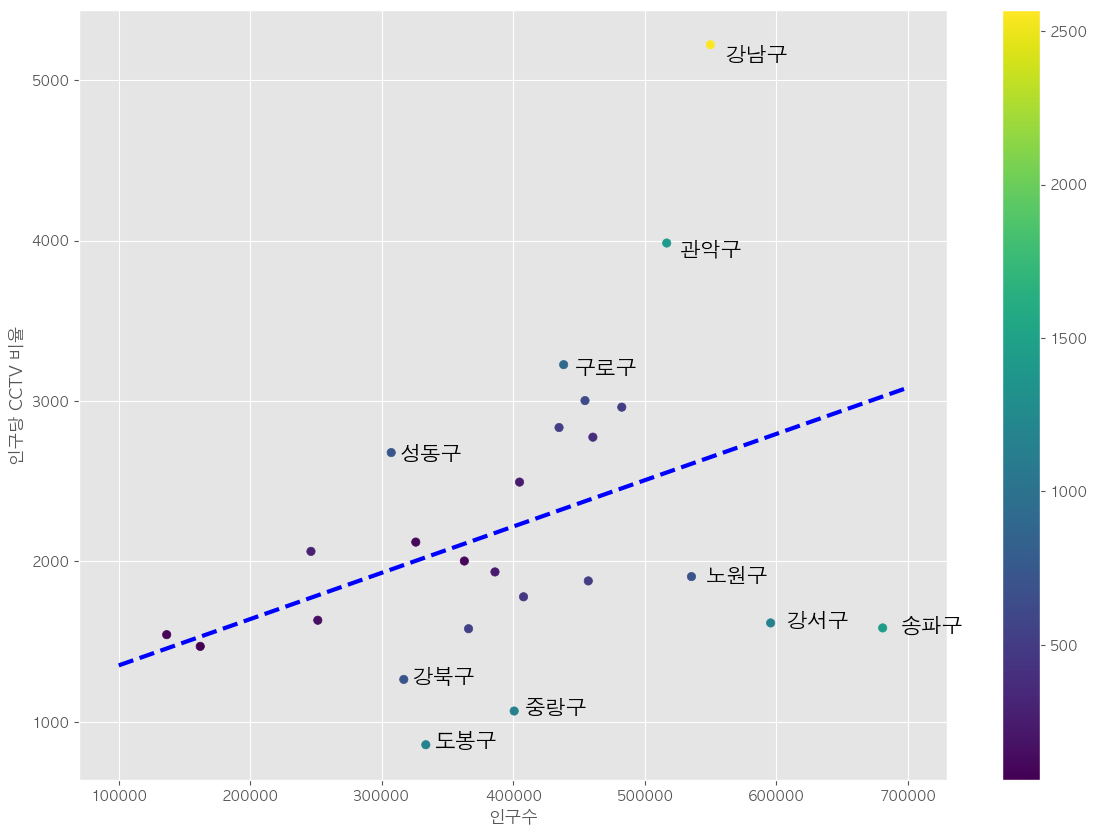

In [44]:
# 그래프에 텍스트와 color
plt.figure(figsize=(14, 10))    # 오차에 대한 범례
plt.scatter(
    data_result['인구수'],
    data_result['소계'],
    c = data_result['오차']
)

plt.plot(fx, f1(fx), ls='dashed', lw=3, color='b')


# 오차가 가장 큰 10개 구에 이름 붙이기
for n in range(10):
    plt.text(
        df_sort['인구수'][n] * 1.02 ,   # x 좌표
        df_sort['소계'][n] * 0.98,     # y 좌표
        df_sort.index[n],
        fontsize=15
    )


plt.xlabel('인구수')
plt.ylabel('인구당 CCTV 비율')
plt.colorbar()
# plt.grid()
plt.show()

In [45]:
data_result

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.232933,1442.540920
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.257275,1168.247488
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757,0.266548,1152.085731
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444,1165.777237
노원구,1906,42.026826,535495,531037,4458,82682,0.832501,15.440294,0.355932,703.063456
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,0.399369,712.934353
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424,0.411122,503.708698
광진구,1581,111.930295,365990,350417,15573,48989,4.255034,13.385338,0.431979,539.002958
동작구,1780,79.254783,407802,395014,12788,63378,3.135836,15.541366,0.436486,460.640093
